<a href="https://colab.research.google.com/github/cleytonyxk/fall2025/blob/main/3_avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.04G/2.04G [00:21<00:00, 102MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install kagglehub


In [ ]:
import os

dataset_path = '/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3'
print(os.listdir(dataset_path))  # Lista as subpastas no dataset


['plantvillage dataset']


Dataset preparado!
Found 37998 images belonging to 38 classes.
Found 10912 images belonging to 38 classes.
Found 5395 images belonging to 38 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.3451 - loss: 2.4920 - val_accuracy: 0.7558 - val_loss: 0.8777
Epoch 2/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 56s 47ms/step - accuracy: 0.6514 - loss: 1.1554 - val_accuracy: 0.8214 - val_loss: 0.5763
Epoch 3/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 56s 47ms/step - accuracy: 0.7306 - loss: 0.8493 - val_accuracy: 0.8525 - val_loss: 0.4629
Epoch 4/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7747 - loss: 0.6959 - val_accuracy: 0.8648 - val_loss: 0.4324
Epoch 5/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.8151 - loss: 0.5829 - val_accuracy: 0.8742 - val_loss: 0.4081
Epoch 6/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 55s 46ms/step - accuracy: 0.8390 - loss: 0.5061 - val_accuracy: 0.8967 - val_loss: 0.3189
Epoch 7/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.8521 - loss: 0.4450 - val_accuracy: 0.9098 - val_loss: 0.2876
Epoch 8/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.8720 - loss: 0.38

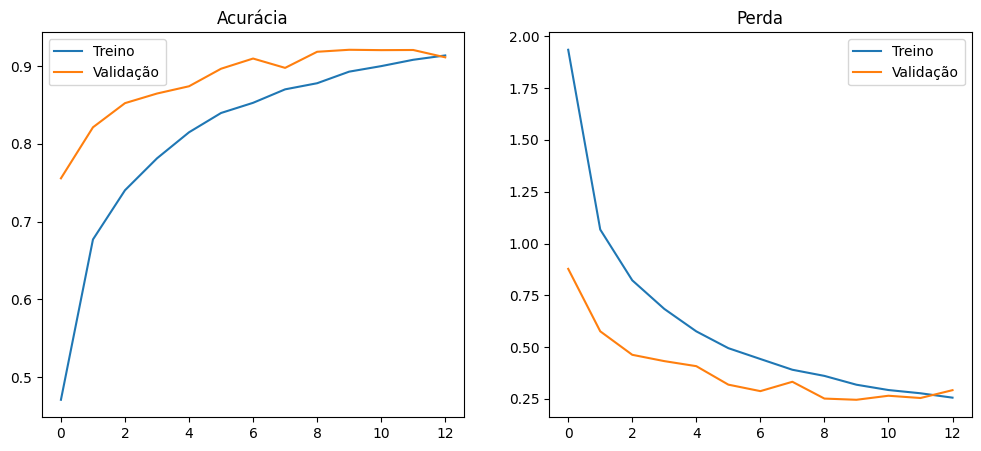

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Configurações gerais
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20
OUTPUT_DIR = "processed_data"

# Diretórios principais
dataset_path = '/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color'

# Divisão do dataset em treino, validação e teste
def prepare_dataset(base_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir, exist_ok=True)

    train_dir = os.path.join(output_dir, "train")
    val_dir = os.path.join(output_dir, "val")
    test_dir = os.path.join(output_dir, "test")

    for folder in [train_dir, val_dir, test_dir]:
        os.makedirs(folder, exist_ok=True)

    classes = os.listdir(base_dir)
    for class_name in classes:
        class_path = os.path.join(base_dir, class_name)
        images = os.listdir(class_path)

        train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
        val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.33, random_state=42)

        for folder, imgs in zip([train_dir, val_dir, test_dir], [train_imgs, val_imgs, test_imgs]):
            class_folder = os.path.join(folder, class_name)
            os.makedirs(class_folder, exist_ok=True)

            for img in imgs:
                src_path = os.path.join(class_path, img)
                dest_path = os.path.join(class_folder, img)
                shutil.copy(src_path, dest_path)

    print("Dataset preparado!")
    return train_dir, val_dir, test_dir

# Preparar dataset
train_dir, val_dir, test_dir = prepare_dataset(dataset_path, OUTPUT_DIR)

# Criar geradores de dados
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Criar modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks para salvar o melhor modelo
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True)
]



# Treinar o modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(test_generator)
print(f"Teste Acurácia: {test_acc:.4f}")

# Plotar resultados
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treino')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title('Acurácia')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Perda')
    plt.legend()
    plt.show()

plot_history(history)


169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step


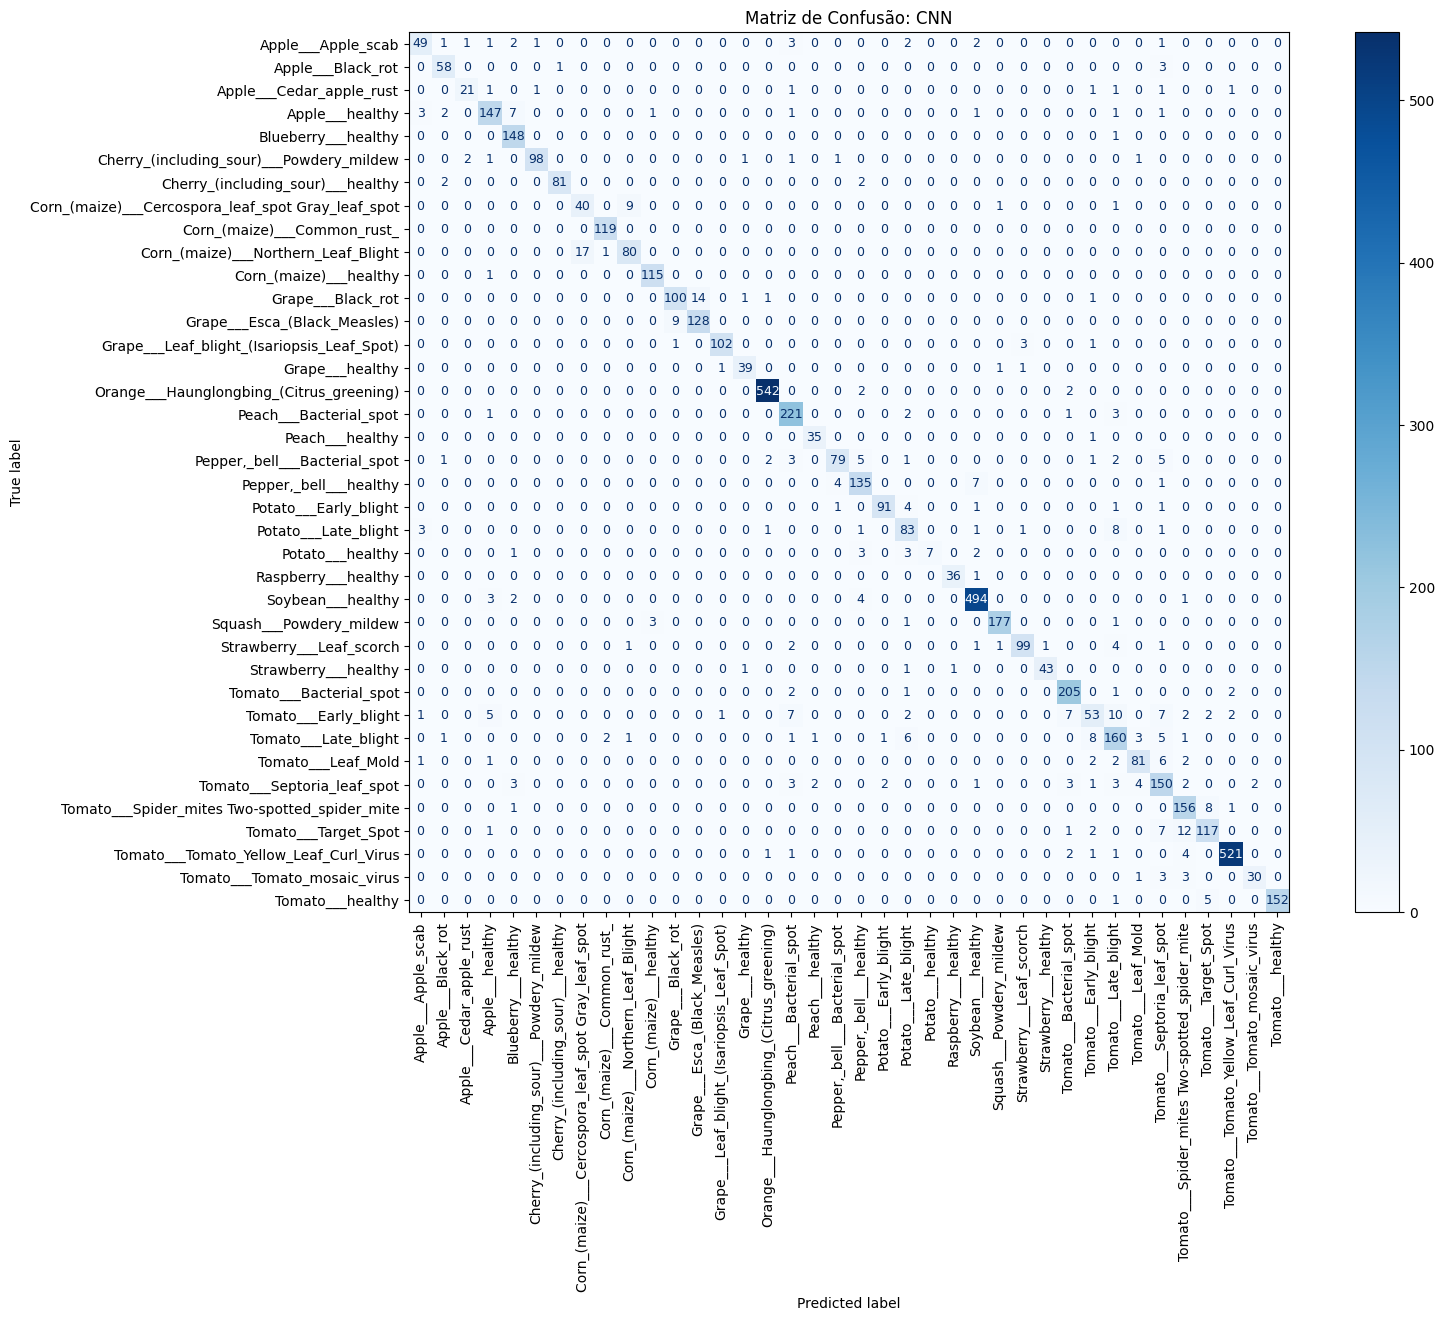

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Carregar o modelo salvo
model_cnn = load_model("/content/best_model.keras")

# Prever as classes para o conjunto de teste
predictions = model_cnn.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Classes previstas
true_classes = test_generator.classes  # Classes reais
class_labels = list(test_generator.class_indices.keys())  # Rótulos das classes

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Exibir a matriz de confusão com subgráficos, cmap=plt.cm.Blues, e aumento do espaço
fig, ax = plt.subplots(figsize=(12, 8))  # Tamanho ajustado para a exibição

# Exibindo a matriz de confusão com aumento do espaço
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')

# Ajustar o espaçamento para evitar corte dos números
plt.subplots_adjust(left=0.1, right=1.2, top=1.2, bottom=0.1)

# Aumentar a visibilidade dos números
for text in ax.texts:
    text.set_fontsize(9)  # Aumenta o tamanho da fonte dos números

# Título
ax.set_title("Matriz de Confusão: CNN")
plt.show()


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import gradio as gr
import os

# Carregar o modelo salvo
model = load_model("best_model.keras")

# Função para pré-processar a imagem e fazer a previsão
def classify_image(image):
    # Converte a imagem para o formato correto
    resized_image = cv2.resize(image, (128, 128))  # Redimensiona para 128x128
    normalized_image = resized_image / 255.0  # Normaliza a imagem

    # Adiciona a dimensão extra para compatibilidade com a entrada do modelo (batch_size, height, width, channels)
    input_image = np.expand_dims(normalized_image, axis=0)  # Adiciona a dimensão do batch (número de imagens)

    # Fazendo a previsão
    prediction = model.predict(input_image)
    predicted_class = np.argmax(prediction)  # Pega a classe com maior probabilidade

    # Recupera o nome da classe
    class_names = list(os.listdir('/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color'))
    predicted_class_name = class_names[predicted_class]

    # Exibe a imagem com a previsão
    plt.imshow(resized_image)
    plt.axis('off')
    plt.title(f'Classe Prevista: {predicted_class_name}')
    plt.show()

    # Retorna a classe prevista para exibição no Gradio
    return f"Classe Prevista: {predicted_class_name}"

# Interface Gradio
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="numpy", label="Carregue uma imagem de planta"),  # Entrada RGB
    outputs=gr.Text(label="Resultado da Classificação"),  # Exibe a classe prevista
    title="Classificador de Plantas",
    description="Carregue uma imagem de uma planta para classificá-la usando o modelo treinado."
)

# Executa a interface
iface.launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0bf0a5ba9fcefe988e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
